**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **1. Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 các ca khúc hay nhất trong 1 tuần từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
spotify_df = pd.read_csv("csv/final.csv", index_col= 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9484\2503757291.py:1: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_df = pd.read_csv("csv/final.csv", index_col= 0)


## Một số thông tin cơ bản của Data Frame

Xem vài dòng dữ liệu

In [4]:
spotify_df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Plan A,...,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,ARRANCARMELO,...,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Chance,...,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,Una Noche en Medellín,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,cuatro veinte,...,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish,0


Số chiều của Data Frame

In [5]:
spotify_df.shape

(1787999, 35)

Tên của các cột

In [6]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'collab', 'track_name',
       'release_date', 'album_num_tracks', 'album_cover', 'source',
       'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'week',
       'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'country', 'region', 'language', 'pivot'],
      dtype='object')

## Thông tin của một dòng

Mỗi một dòng dữ liệu là thông tin của một bài hát thịnh hành trong TOP 200 của một tuần bất kì.

## Thông tin của một cột

In [7]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
columns_describe_df = pd.read_csv("csv/columns.csv")
columns_describe_df

,Tên cột,Mô tả
0,uri,URI của bản nhạc trên spotify
1,rank,Xếp hạng của bản nhạc trong tuần
2,artist names,Tên tất cả người thực hiện ca khúc
3,artists num,Số người thực hiện bài hát
4,artist individual,Bài hát của cá nhân nghệ sĩ
5,artist id,URI của nghệ sĩ độc quyền bài hát
6,artist genre,Thể loại mà nghệ sĩ trình diễn
7,artist img,Đường dẫn hình ảnh của nghệ sĩ
8,collab,0 nếu nghệ sĩ trình diễn một mình và 1 nếu ngược lại
9,track name,tên của bản nhạc


Để thuận tiện cho việc xử lí dữ liệu, nên chọn ra những cột thể hiện được đặc trưng của dữ liệu, một phần giúp giảm lượng dữ liệu cần giải quyết

Các cột cần thiết như: <br>
**Về bản nhạc**: uri, rank, artists_name, artists_num, artist_individual, collab, track_name, release_date, source, peak_rank, previous_rank, weeks_on_rank, streams, country, region, language<br>
**Về nghệ sĩ độc quyền của bản nhạc**: artist_id, artist_genre<br>

In [8]:
# cols = ["uri", "rank", 'artist_names', 'artists_num', 'artist_individual', 'collab', 'track_name', 'release_date', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'country', 'region', 'language', 'artist_id', 'artist_genre']
# spotify_df = spotify_df[cols]
spotify_df = spotify_df[spotify_df.columns[~spotify_df.columns.isin(['artist img','album cover', 'album num tracks', 'source', 'pivot'])]]

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787999 entries, 0 to 1787998
Data columns (total 33 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   uri                object
 1   rank               object
 2   artist_names       object
 3   artists_num        object
 4   artist_individual  object
 5   artist_id          object
 6   artist_genre       object
 7   artist_img         object
 8   collab             object
 9   track_name         object
 10  release_date       object
 11  album_num_tracks   object
 12  album_cover        object
 13  peak_rank          object
 14  previous_rank      object
 15  weeks_on_chart     object
 16  streams            object
 17  week               object
 18  danceability       object
 19  energy             object
 20  key                object
 21  mode               object
 22  loudness           object
 23  speechiness        object
 24  acousticness       object
 25  instrumentalness   object
 26  liveness      

**Xảy ra một số vấn đề về kiểu dữ liệu. Là do có nhiều kiểu dữ liệu bên trong cột.**

In [10]:
def open_oject_dtype(column):
    dtypes = set(column.apply(lambda x: type(x)))
    
    return dtypes

In [11]:
columns = spotify_df.columns
# open_oject_dtype(spotify_df["uri"])
spotify_df[columns].apply(open_oject_dtype)

uri                                                  {<class 'str'>}
rank                                  {<class 'int'>, <class 'str'>}
artist_names                                         {<class 'str'>}
artists_num                         {<class 'float'>, <class 'str'>}
artist_individual                                    {<class 'str'>}
artist_id                                            {<class 'str'>}
artist_genre                                         {<class 'str'>}
artist_img                          {<class 'float'>, <class 'str'>}
collab                                {<class 'int'>, <class 'str'>}
track_name                                           {<class 'str'>}
release_date                                         {<class 'str'>}
album_num_tracks                    {<class 'float'>, <class 'str'>}
album_cover                         {<class 'float'>, <class 'str'>}
peak_rank                             {<class 'int'>, <class 'str'>}
previous_rank                     

In [12]:
# spotify_df["rank"].unique()

# spotify_df["artists_num"].unique()

# spotify_df["collab"].unique()

# spotify_df["peak_rank"].unique()

# spotify_df["previous_rank"].unique()

# spotify_df["weeks_on_chart"].unique()

# spotify_df["streams"].unique()

# spotify_df[spotify_df["uri"] == "uri"]

Cột `rank`, `artists_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams`: một phần số với kiểu dữ liệu **int**, một phần số với kiểu dữ liệu là **str**<br>
Và có vài dòng trùng với tên cột. Và có 73 dòng như vậy.

Xem qua một vài thống kê của dữ liệu

In [13]:
spotify_df.describe()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
count,1787999,1787999,1787999,1787999,1787999,1787999,1787999,1778680,1787999,1787999,1787999,1787999,1787982,1787999,1787999,1787999,1787999,1787999,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787604,1787999,1787999,1787999
unique,39203,401,19383,36,15044,15258,1875,14425,5,32673,3259,131,27254,401,403,581,569044,291,1569,1857,37,7,18263,2624,5465,7734,2878,2368,32794,43428,75,11,41
top,spotify:track:4iJyoBOLtHqaGxP12qzhQI,12,Bad Bunny,1.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,pop,https://i.scdn.co/image/ab6761610000e5eb8ee9a6f54dcbd4bc95126b14,1,Enemy (with JID) - from the series Arcane League of Legends,2021-06-25,1.0,https://i.scdn.co/image/ab67616d0000b273e6f407c7f3a0ec98845e4431,1,-1,1,streams,2022-03-31,0.8240000000000001,0.825,1,1,-6.181,0.0309,0.237,0.0,0.111,0.46399999999999997,90.03,173381,Global,Europe,Spanish
freq,9360,5894,17473,515719,41290,41290,156910,41290,614704,9908,24732,488820,15771,110446,110859,74609,73,23350,12527,10589,129913,517081,6496,8721,9314,622981,17846,9323,6201,5181,95932,703860,503345


## **Kiểm tra xem các trường dữ liệu có vấn đề gì không**

**Dữ liệu bị thiếu, rỗng**

In [14]:
# spotify_df[spotify_df.isna().any(axis=1)]
# spotify_df[spotify_df.isnull().any(axis=1)]

spotify_df.isna().sum()

uri                     0
rank                    0
artist_names            0
artists_num             0
artist_individual       0
artist_id               0
artist_genre            0
artist_img           9319
collab                  0
track_name              0
release_date            0
album_num_tracks        0
album_cover            17
peak_rank               0
previous_rank           0
weeks_on_chart          0
streams                 0
week                    0
danceability          395
energy                395
key                   395
mode                  395
loudness              395
speechiness           395
acousticness          395
instrumentalness      395
liveness              395
valence               395
tempo                 395
duration              395
country                 0
region                  0
language                0
dtype: int64

Như vậy tất cả các cột đều không thiếu dữ liệu.

**Dữ liệu có bị trùng hay không?**

In [15]:
spotify_df.duplicated().value_counts()

False    1787927
True          72
dtype: int64

In [16]:
spotify_df[spotify_df.duplicated()]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
51224,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
75474,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
81333,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
104818,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
133873,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684645,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1705705,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1736824,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1758970,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language


Như vậy có đến 73 giá trị trùng nhau (72 + 1 giá trị gốc), và bằng với số lượng dòng có giá trị giống tên cột. Như vậy dữ liệu hầu như không có giá trị nào bị trùng cả.

Ta sẽ loại bỏ các dòng này và loại bỏ luôn dòng gốc 

In [17]:
spotify_df.drop_duplicates(keep=False, inplace=True)
spotify_df.duplicated().sum()

0

Xem lại các cột dữ liệu:

In [18]:
spotify_df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a976c5597baf6f7b786c,0,Plan A,2022-03-23,1.0,https://i.scdn.co/image/ab67616d0000b2737e1179e64539bedc938933ef,1,1,4,3003411,2022-04-14,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e1511f68e988110962dd9c,0,ARRANCARMELO,2022-04-06,1.0,https://i.scdn.co/image/ab67616d0000b273d8c9945c63f1806031dae6f0,2,129,2,2512175,2022-04-14,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a976c5597baf6f7b786c,0,Chance,2022-04-06,2.0,https://i.scdn.co/image/ab67616d0000b273274a28ec692ca28a73da1288,3,59,2,2408983,2022-04-14,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebcf4a5d23a2515374f89,0,Una Noche en Medellín,2022-01-21,1.0,https://i.scdn.co/image/ab67616d0000b273697ed12671078b5dee48f0ad,5,5,8,2080139,2022-04-14,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1453d77d1d758c224bd,0,cuatro veinte,2022-03-24,1.0,https://i.scdn.co/image/ab67616d0000b273116b57ed14bc15d57eb838fa,6,9,3,1923270,2022-04-14,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish


##### **Ta thấy các cột `rank`, `artist_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` lẽ ra phải có kiểu dữ liệu là numeric.** 
- Do đó ta sẽ tiến hành chuyển các cột này về đúng kiểu dữ liệu.<br>
- Ta sẽ viết hàm để thuận tiện cho việc chuyển.<br>
- Riêng cột `artists_num` có thêm hậu tố .0 phía sau nên sẽ xử lý riêng.

In [19]:
def to_numeric(column, data_type):
    spotify_df[column] = spotify_df[column].astype(data_type)
    #return spotify_df[column]
# print(spotify_df)

In [20]:
to_numeric('rank', int)

In [21]:
to_numeric('peak_rank', int)

In [22]:
to_numeric('previous_rank', int)

In [23]:
spotify_df['artists_num'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1787926 entries, 0 to 1787998
Series name: artists_num
Non-Null Count    Dtype 
--------------    ----- 
1787926 non-null  object
dtypes: object(1)
memory usage: 27.3+ MB


Cột `artists_num` có mixtypes

In [24]:
count = spotify_df['artists_num'].value_counts()
count[count.index=='1.0'].sum()

515719

<AxesSubplot: >

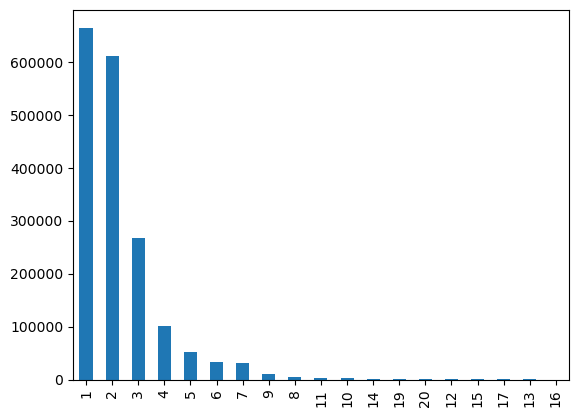

In [25]:
spotify_df['artists_num'] = spotify_df['artists_num'].apply(lambda x: str(x).replace('.0', '')).astype('Int64')
spotify_df['artists_num'].value_counts().plot.bar()

In [26]:
to_numeric('collab', int)
spotify_df['collab'].value_counts()

1    1122330
0     665596
Name: collab, dtype: int64

**Số lượng giá trị 0 ở cột collab và giá trị 1 ở cột artists_num phải bằng nhau (số lượng nghệ sĩ biểu diễn là 1 người thì có nghĩa là không collab với ai)**

In [27]:
test = spotify_df[spotify_df['artists_num'] == 1].index == spotify_df[spotify_df['collab'] == 0].index
test.sum()

665596

Vậy ta có thể loại cột `collab` để giảm chiều dữ liệu? (vì từ cột `artists_num` có thể suy ra được cột `collab`)  

Ngoài ra, ta cũng cần chuyển kiểu dữ liệu của `release_date` về thành datetime

In [28]:
pattern = '%Y-%m-%d'
pd.to_datetime(spotify_df['release_date'], format=pattern)

0         2022-03-23
1         2022-04-06
2         2022-04-06
3         2022-01-21
4         2022-03-24
             ...    
1787994   2012-01-01
1787995   2012-01-01
1787996   2021-10-22
1787997   2021-10-22
1787998   2021-10-22
Name: release_date, Length: 1787926, dtype: datetime64[ns]

In [29]:
spotify_df['artist_genre'].value_counts()

pop                   156910
0                     114300
trap latino            86148
reggaeton              73510
latin                  73195
                       ...  
indie extremena            1
finnish post-punk          1
organic house              1
symphonic metal            1
cumbia del sureste         1
Name: artist_genre, Length: 1874, dtype: int64

In [30]:
spotify_df[spotify_df['artist_genre'].str.contains('pop', case=False)]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1453d77d1d758c224bd,0,cuatro veinte,2022-03-24,1.0,https://i.scdn.co/image/ab67616d0000b273116b57ed14bc15d57eb838fa,6,9,3,1923270,2022-04-14,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,0,As It Was,2022-03-31,1.0,https://i.scdn.co/image/ab67616d0000b273b46f74097655d7f353caab14,6,6,2,1555631,2022-04-14,0.52,0.731,6.0,0.0,-5.338,0.0557,0.342,0.00101,0.311,0.662,173.93,167303.0,Argentina,South America,Spanish
7,spotify:track:42Gzfqnfpk7Pp1ydM60eNn,20,Maria Becerra,1,Maria Becerra,spotify:artist:1DxLCyH42yaHKGK3cl5bvG,pop argentino,https://i.scdn.co/image/ab6761610000e5eb459b9d1006bd715a7e2d5663,0,Felices x Siempre,2022-02-22,1.0,https://i.scdn.co/image/ab67616d0000b2734d647b8989fa65faeeb841f6,11,15,8,1149499,2022-04-14,0.771,0.467,5.0,0.0,-6.653,0.123,0.375,0.00974,0.112,0.256,100.089,199657.0,Argentina,South America,Spanish
8,spotify:track:3FkeNbs9Zeiqkr3WkbOiGp,23,Anitta,1,Anitta,spotify:artist:7FNnA9vBm6EKceENgCGRMb,funk pop,https://i.scdn.co/image/ab6761610000e5eb847940395e7b755f626ad139,0,Envolver,2022-04-12,15.0,https://i.scdn.co/image/ab67616d0000b27396e2642422ad16661e673fa2,13,17,6,1104997,2022-04-14,0.812,0.736,4.0,0.0,-5.421,0.0833,0.152,0.00254,0.0914,0.396,91.993,193806.0,Argentina,South America,Spanish
14,spotify:track:2cR9cH9ta7MStHBKs0aOcz,35,Salastkbron,1,Salastkbron,spotify:artist:3WMlRpW5JWuDI95TcEWt3r,pop argentino,https://i.scdn.co/image/ab6761610000e5eb5f3a466d7783b3130b87ab69,0,TITAN,2021-10-14,1.0,https://i.scdn.co/image/ab67616d0000b273a95aa3aaa76f83d4427625ee,2,29,20,838194,2022-04-14,0.725,0.49,5.0,0.0,-9.487,0.187,0.341,0.0,0.0978,0.96,180.042,122137.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787990,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2,Binz,spotify:artist:2nSO7JYDbJrYbJmP39qUzj,v-pop,https://i.scdn.co/image/ab6761610000e5eb6f9ec80eb4598f551999c3ae,1,Cho Mình Em,2021-04-01,1.0,https://i.scdn.co/image/ab67616d0000b273a1ca722c889a36ec84d48649,32,193,56,37880,2022-05-05,0.603,0.412,0,1,-10.359,0.0579,0.891,0.0212,0.115,0.371,99.886,206400,Vietnam,Asia,Vietnamese
1787991,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2,Đen,spotify:artist:1LEtM3AleYg1xabW6CRkpi,v-pop,https://i.scdn.co/image/ab6761610000e5eb37206c8851747995ecf49f9d,1,Cho Mình Em,2021-04-01,1.0,https://i.scdn.co/image/ab67616d0000b273a1ca722c889a36ec84d48649,32,193,56,37880,2022-05-05,0.603,0.412,0,1,-10.359,0.0579,0.891,0.0212,0.115,0.371,99.886,206400,Vietnam,Asia,Vietnamese
1787992,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2,Kai Đinh,spotify:artist:3E6LGptA8lBEXPHAQCE3vr,v-pop,https://i.scdn.co/image/ab6761610000e5eb8c1162744cc256860318fe92,1,Thế Hệ Tan Vỡ (feat. SIVAN),2021-11-17,1.0,https://i.scdn.co/image/ab67616d0000b2734493b8e39ce5d7d633882637,120,200,13,37825,2022-05-05,0.696,0.477,6,0,-11.058,0.0421,0.671,0.000367,0.0938,0.335,140.112,288000,Vietnam,Asia,Vietnamese
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,pop,https://i.scdn.co/image/ab6761610000e5eb288ac05481cedc5bddb5b11b,1,Payphone,2012-01-01,33.0,https://i.scdn.co/image/ab67616d0000b273fc8633e22a7dba6aab817bff,197,-1,1,

***

**Ta thấy có rất nhiều thể loại nhạc (1874 thể loại)**
- Tại sao lại có thể loại nhạc là 0, nghĩa là không có thể loại nhạc (không có thông tin) hay lý do gì khác? Các giá trị này đến từ đâu?

In [31]:
spotify_df[spotify_df['artist_genre']=='0']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,37,31,803350,2022-04-14,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.0,0.243,0.529,82.18,428439.0,Argentina,South America,Spanish
52,spotify:track:6bLvfGI2XeU5DTl8feuNrk,135,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,139,141,285952,2022-04-14,0.59,0.857,10.0,0.0,-1.986,0.0553,0.289,0.000004,0.0414,0.976,135.29,227396.0,Argentina,South America,Spanish
108,spotify:track:1fKFxmSByZfjwVSbq0PHye,45,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,41,33,704832,2022-04-28,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.0,0.243,0.529,82.18,428439.0,Argentina,South America,Spanish
154,spotify:track:6bLvfGI2XeU5DTl8feuNrk,161,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,138,143,254727,2022-04-28,0.59,0.857,10.0,0.0,-1.986,0.0553,0.289,0.000004,0.0414,0.976,135.29,227396.0,Argentina,South America,Spanish
207,spotify:track:6bLvfGI2XeU5DTl8feuNrk,94,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,92,90,291731,2021-04-08,0.59,0.857,10.0,0.0,-1.986,0.0553,0.289,0.000004,0.0414,0.976,135.29,227396.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787980,spotify:track:7k3ohP9ZiGfhL6yD8oIPfk,179,"Lu, Willistic, datfitzx",3,datfitzx,spotify:artist:2rkSOVm1YGlmjYTgmmfZd7,0,https://i.scdn.co/image/ab6761610000e5eb39b94e591a0fa89be4aecf58,1,chẳng giống giáng sinh,2021-12-05,1.0,https://i.scdn.co/image/ab67616d0000b273863a939d3a2512ee5276dba2,65,188,8,40616,2022-05-05,0.642,0.311,0,1,-8.675,0.0339,0.86,0.0,0.111,0.105,95.037,192000,Vietnam,Asia,Vietnamese
1787983,spotify:track:1c0LbgYt51JeBUMAzofjkq,183,"TGSN, tlinh, RZ Mas",3,RZ Mas,spotify:artist:39UJlviUwzZGZrA8DiQy31,0,https://i.scdn.co/image/ab6761610000e5ebf81be8e7f615c7b12d5876f7,1,Siren,2021-05-21,1.0,https://i.scdn.co/image/ab67616d0000b2734b5ecdb4c6cccb601677ad94,31,187,17,39591,2022-05-05,0.878,0.732,11,0,-6.092,0.115,0.548,0.000001,0.258,0.777,130.001,157067,Vietnam,Asia,Vietnamese
1787985,spotify:track:4HlHNLtfxP7Y5z03j3eNOi,184,"Sơn Tùng M-TP, Onionn",2,Onionn,spotify:artist:25M5YMbLCbYDSFPhQXYE8c,0,https://i.scdn.co/image/ab6761610000e5eb78acc69f189aa5dc006e92f1,1,CHẠY NGAY ĐI,2018-05-11,1.0,https://i.scdn.co/image/ab67616d0000b273eda65b93d53c2f982c5d57d8,1,-1,60,39561,2022-05-05,0.728,0.806,2,0,-3.824,0.0504,0.423,0.0,0.0883,0.453,127.02,272508,Vietnam,Asia,Vietnamese
1787986,spotify:track:2dZP47k5zETHUQWhxwv3hz,186,"Vang, Cloud 5",2,Vang,spotify:artist:6bvMoywdm3JM1bmVvMngrW,0,https://i.scdn.co/image/ab67616d0000b273fb865c03a5aeb19c2630a246,1,Em Là Hoàng Hôn,2021-05-29,1.0,https://i.scd

In [32]:
spotify_df[spotify_df['artist_genre']=='0']['country'].value_counts()

Poland          4713
India           3899
South Africa    3572
Vietnam         3333
Brazil          3142
                ... 
Kazakhstan       396
Nigeria          381
Belarus          366
Japan            316
Venezuela        187
Name: country, Length: 74, dtype: int64

In [34]:
spotify_df[spotify_df['country'] == 'Vietnam'].head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1765032,spotify:track:186NCtNk1tUYS7c2DxgJ7O,1,V,1,V,spotify:artist:3JsHnjpbhX4SnySpvpa9DK,korean ost,https://i.scdn.co/image/ab6761610000e5ebfe5cecc2ed191d2db9acdc90,0,Christmas Tree,2021-12-24,2.0,https://i.scdn.co/image/ab67616d0000b2738764ebc69bd91a01cc3948a2,1,-1,1,562360,2021-12-30,0.4370000000000001,0.384,5,1,-8.384,0.042,0.6990000000000001,2.33e-05,0.121,0.18100000000000002,139.009,209947,Vietnam,Asia,Vietnamese
1765033,spotify:track:6Vx29sLFwzT8yvRhzP2Fge,2,K-ICM,1,K-ICM,spotify:artist:6mD6SQbvl9pILx7SAHBzbq,v-pop,https://i.scdn.co/image/ab6761610000e5eb452319dd20e7a4203d286c20,0,Lời Nói Dối Sau Nụ Cười,2021-12-22,1.0,https://i.scdn.co/image/ab67616d0000b273dad23cc289b33b5ea9540a0e,2,30,2,336755,2021-12-30,0.711,0.371,6,0,-8.857999999999997,0.0328,0.857,4.4299999999999986e-05,0.14300000000000002,0.293,129.846,306307,Vietnam,Asia,Vietnamese
1765034,spotify:track:4AgFXIVT7hVhBZ5DEOaLu3,3,Thịnh Suy,1,Thịnh Suy,spotify:artist:2xK6qcvfXuFFbU0NL95aeo,v-pop,https://i.scdn.co/image/ab6761610000e5eb038b4c1646a147f62cd54a63,0,tiny love,2021-12-05,4.0,https://i.scdn.co/image/ab67616d0000b2737fe173c30db7247b73fd9ffa,3,4,4,229161,2021-12-30,0.8240000000000001,0.171,4,0,-15.870999999999999,0.0527,0.857,0.0,0.107,0.693,100.036,158400,Vietnam,Asia,Vietnamese
1765035,spotify:track:6GJi4nSZOiTOU2FhsgxWyH,4,Vũ.,1,Vũ.,spotify:artist:57g2v7gJZepcwsuwssIfZs,vietnamese singer-songwriter,https://i.scdn.co/image/ab6761610000e5ebec1bd421630bf3ad110c09fa,0,Bước Qua Nhau,2021-11-11,2.0,https://i.scdn.co/image/ab67616d0000b2734eca4595da187b3a25eb9958,1,1,7,219198,2021-12-30,0.541,0.33899999999999997,1,1,-6.499,0.0268,0.742,0.000109,0.18600000000000005,0.215,135.757,257647,Vietnam,Asia,Vietnamese
1765036,spotify:track:3XYRV7ZSHqIRDG87DKTtry,6,BTS,1,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop,https://i.scdn.co/image/ab6761610000e5eb5704a64f34fe29ff73ab56bb,0,Permission to Dance,2021-07-23,3.0,https://i.scdn.co/image/ab67616d0000b273a7e481899b7e0396f93d10b8,1,7,25,161229,2021-12-30,0.7020000000000001,0.741,9,1,-5.33,0.0427,0.0054399999999999995,0.0,0.337,0.6459999999999999,124.925,187585,Vietnam,Asia,Vietnamese


Chuyển các cột `đặc trưng` (biên độ, âm lượng, tiết tấu..) của âm thanh thành kiểu dữ liệu numeric

In [35]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

spotify_df[audio_cols].head()

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0
1,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0
2,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0
3,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0
4,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0


In [36]:
spotify_df[audio_cols] = spotify_df[audio_cols].astype(float)

In [37]:
spotify_df[audio_cols].isna().sum()

danceability        395
energy              395
key                 395
mode                395
loudness            395
speechiness         395
acousticness        395
instrumentalness    395
liveness            395
valence             395
tempo               395
duration            395
dtype: int64

### **Trực quan hoá dữ liệu**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'danceability'),
  Text(1.5, 0, 'energy'),
  Text(2.5, 0, 'key'),
  Text(3.5, 0, 'mode'),
  Text(4.5, 0, 'loudness'),
  Text(5.5, 0, 'speechiness'),
  Text(6.5, 0, 'acousticness'),
  Text(7.5, 0, 'instrumentalness'),
  Text(8.5, 0, 'liveness'),
  Text(9.5, 0, 'valence'),
  Text(10.5, 0, 'tempo'),
  Text(11.5, 0, 'duration')])

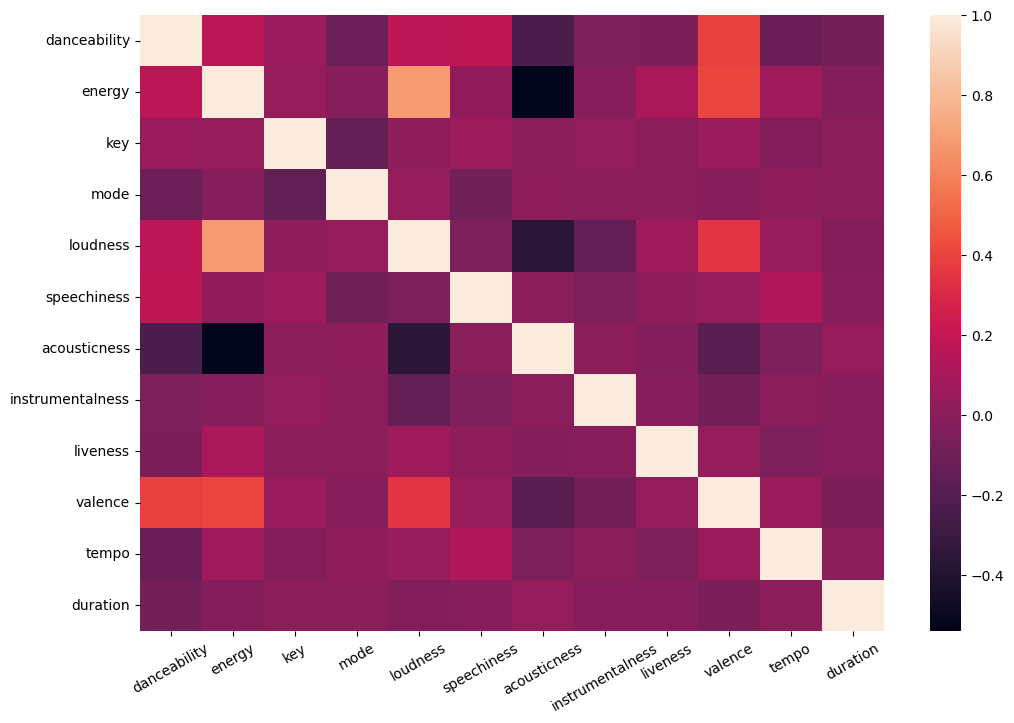

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(spotify_df[audio_cols].corr(), annot=False, fmt='.2f')
plt.xticks(rotation=30)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'danceability'),
  Text(1.5, 0, 'energy'),
  Text(2.5, 0, 'key'),
  Text(3.5, 0, 'mode'),
  Text(4.5, 0, 'loudness'),
  Text(5.5, 0, 'speechiness'),
  Text(6.5, 0, 'acousticness'),
  Text(7.5, 0, 'instrumentalness'),
  Text(8.5, 0, 'liveness'),
  Text(9.5, 0, 'valence'),
  Text(10.5, 0, 'tempo'),
  Text(11.5, 0, 'duration')])

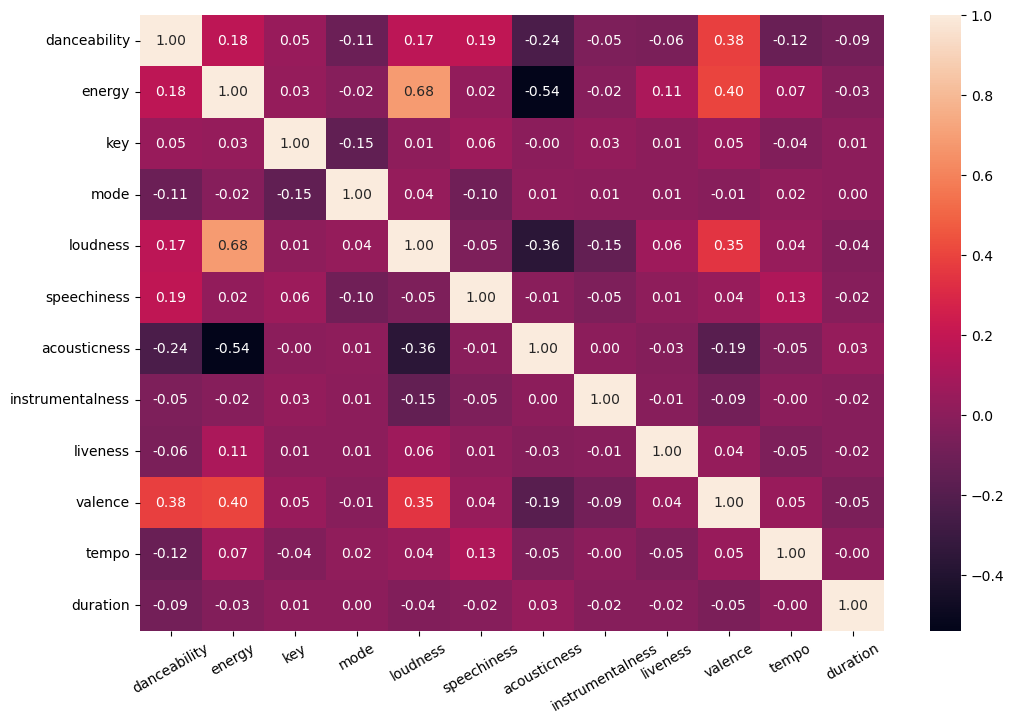

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(spotify_df[audio_cols].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration'}>]], dtype=object)

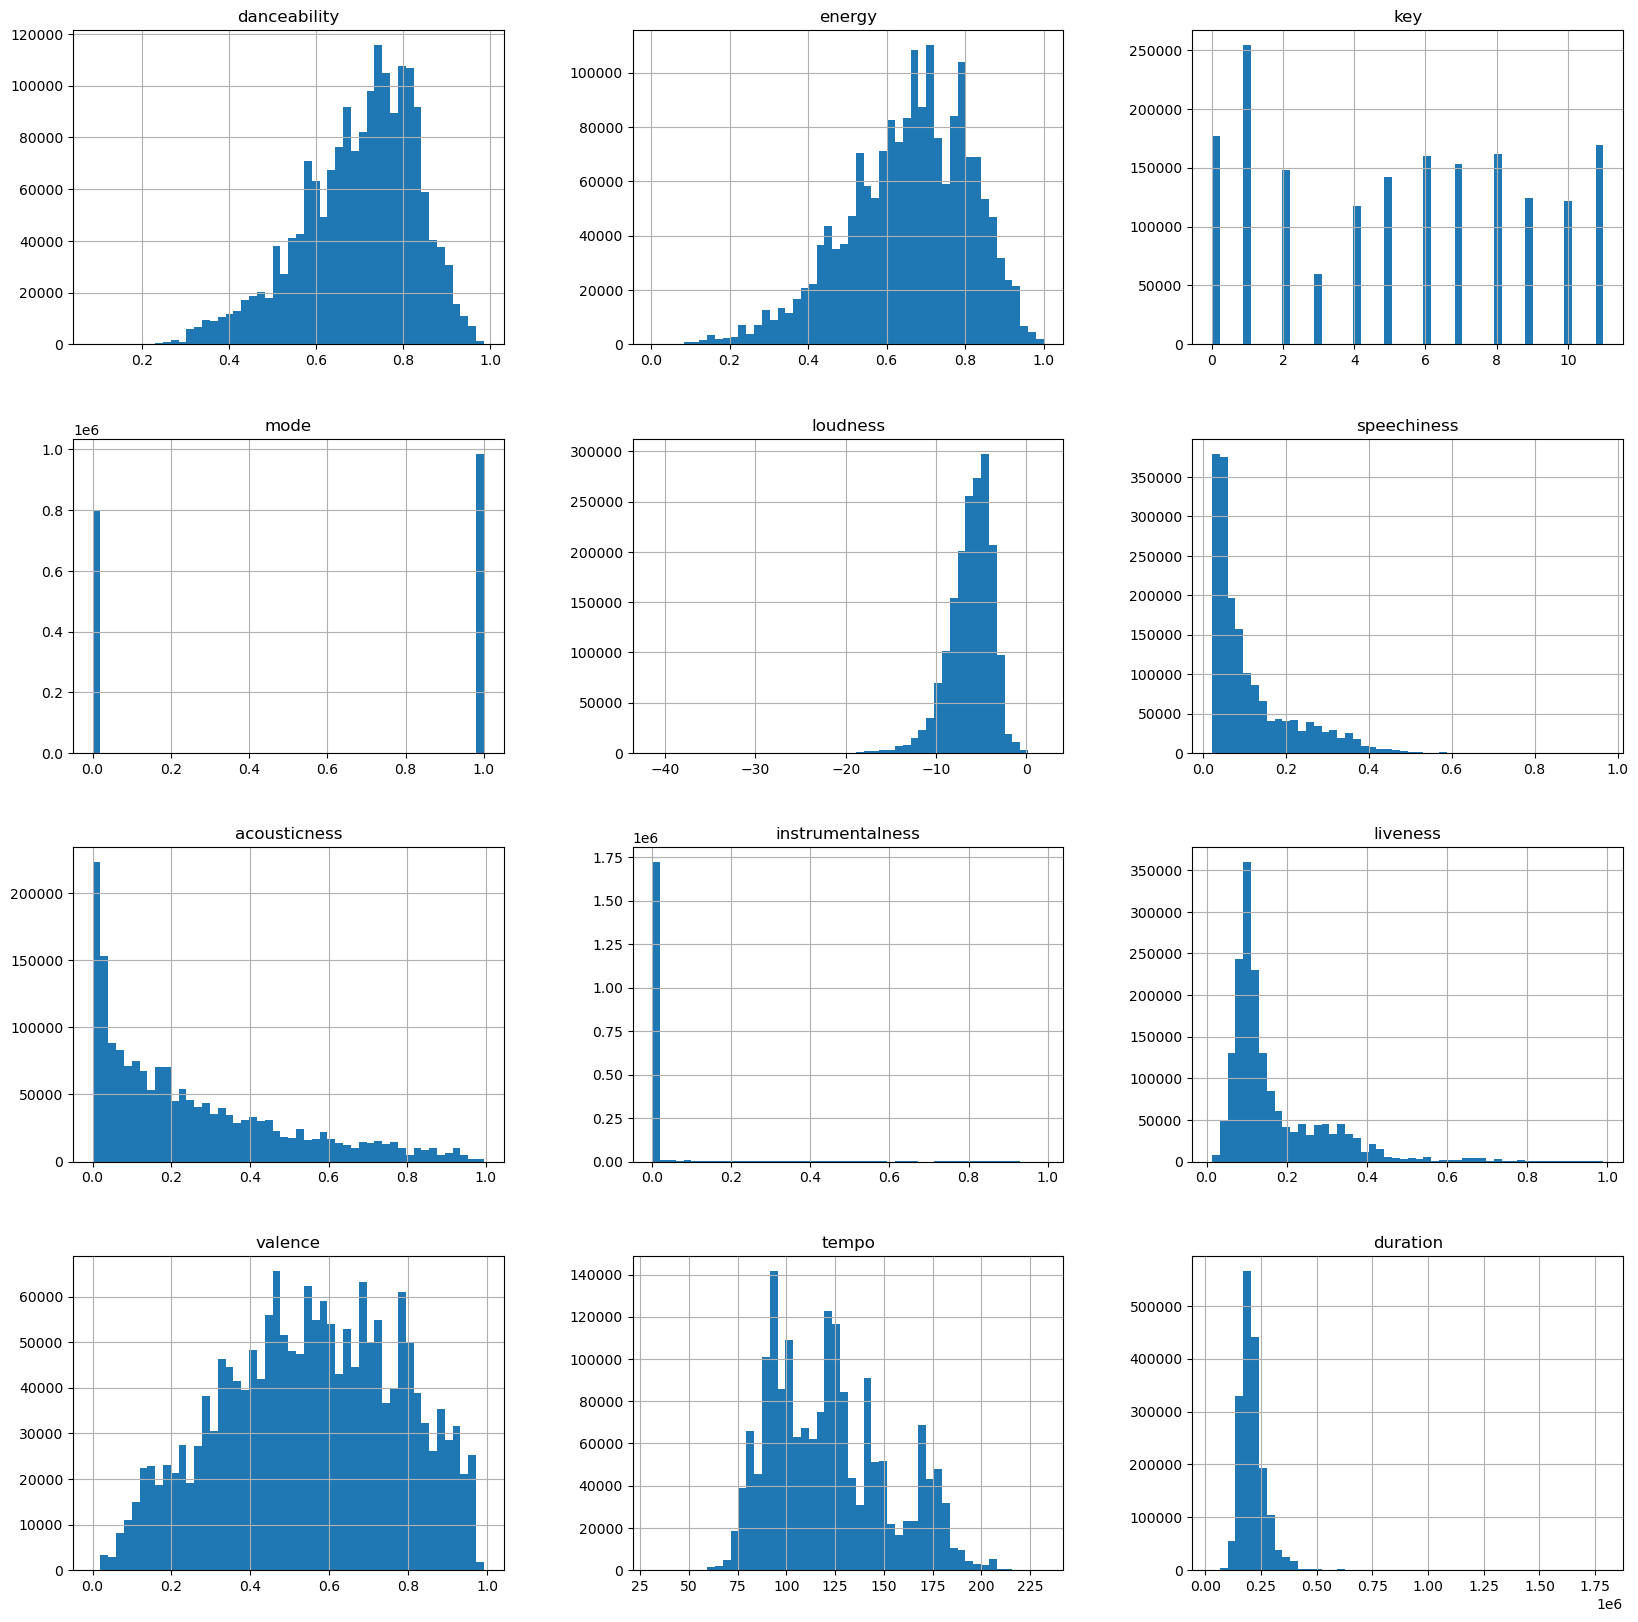

In [40]:
spotify_df[audio_cols].hist(bins=50, figsize=(20,20))
# ax.set_title("Hisogram plot", size=15, weight='bold')

In [41]:
spotify_df.shape

(1787926, 33)

In [42]:
spotify_df.groupby('artist_genre').filter(lambda x: x['artist_genre'].count() > 1000)['artist_genre'].value_counts().sum()

1567501

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [60]:
#using NLTK library, we can do lot of text preprocesing
import nltk
# nltk.download()
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#function to split text into word
tokens = word_tokenize('language=The quick brown fox jumps over the lazy dog')
print(tokens)

['language=The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


<AxesSubplot: >

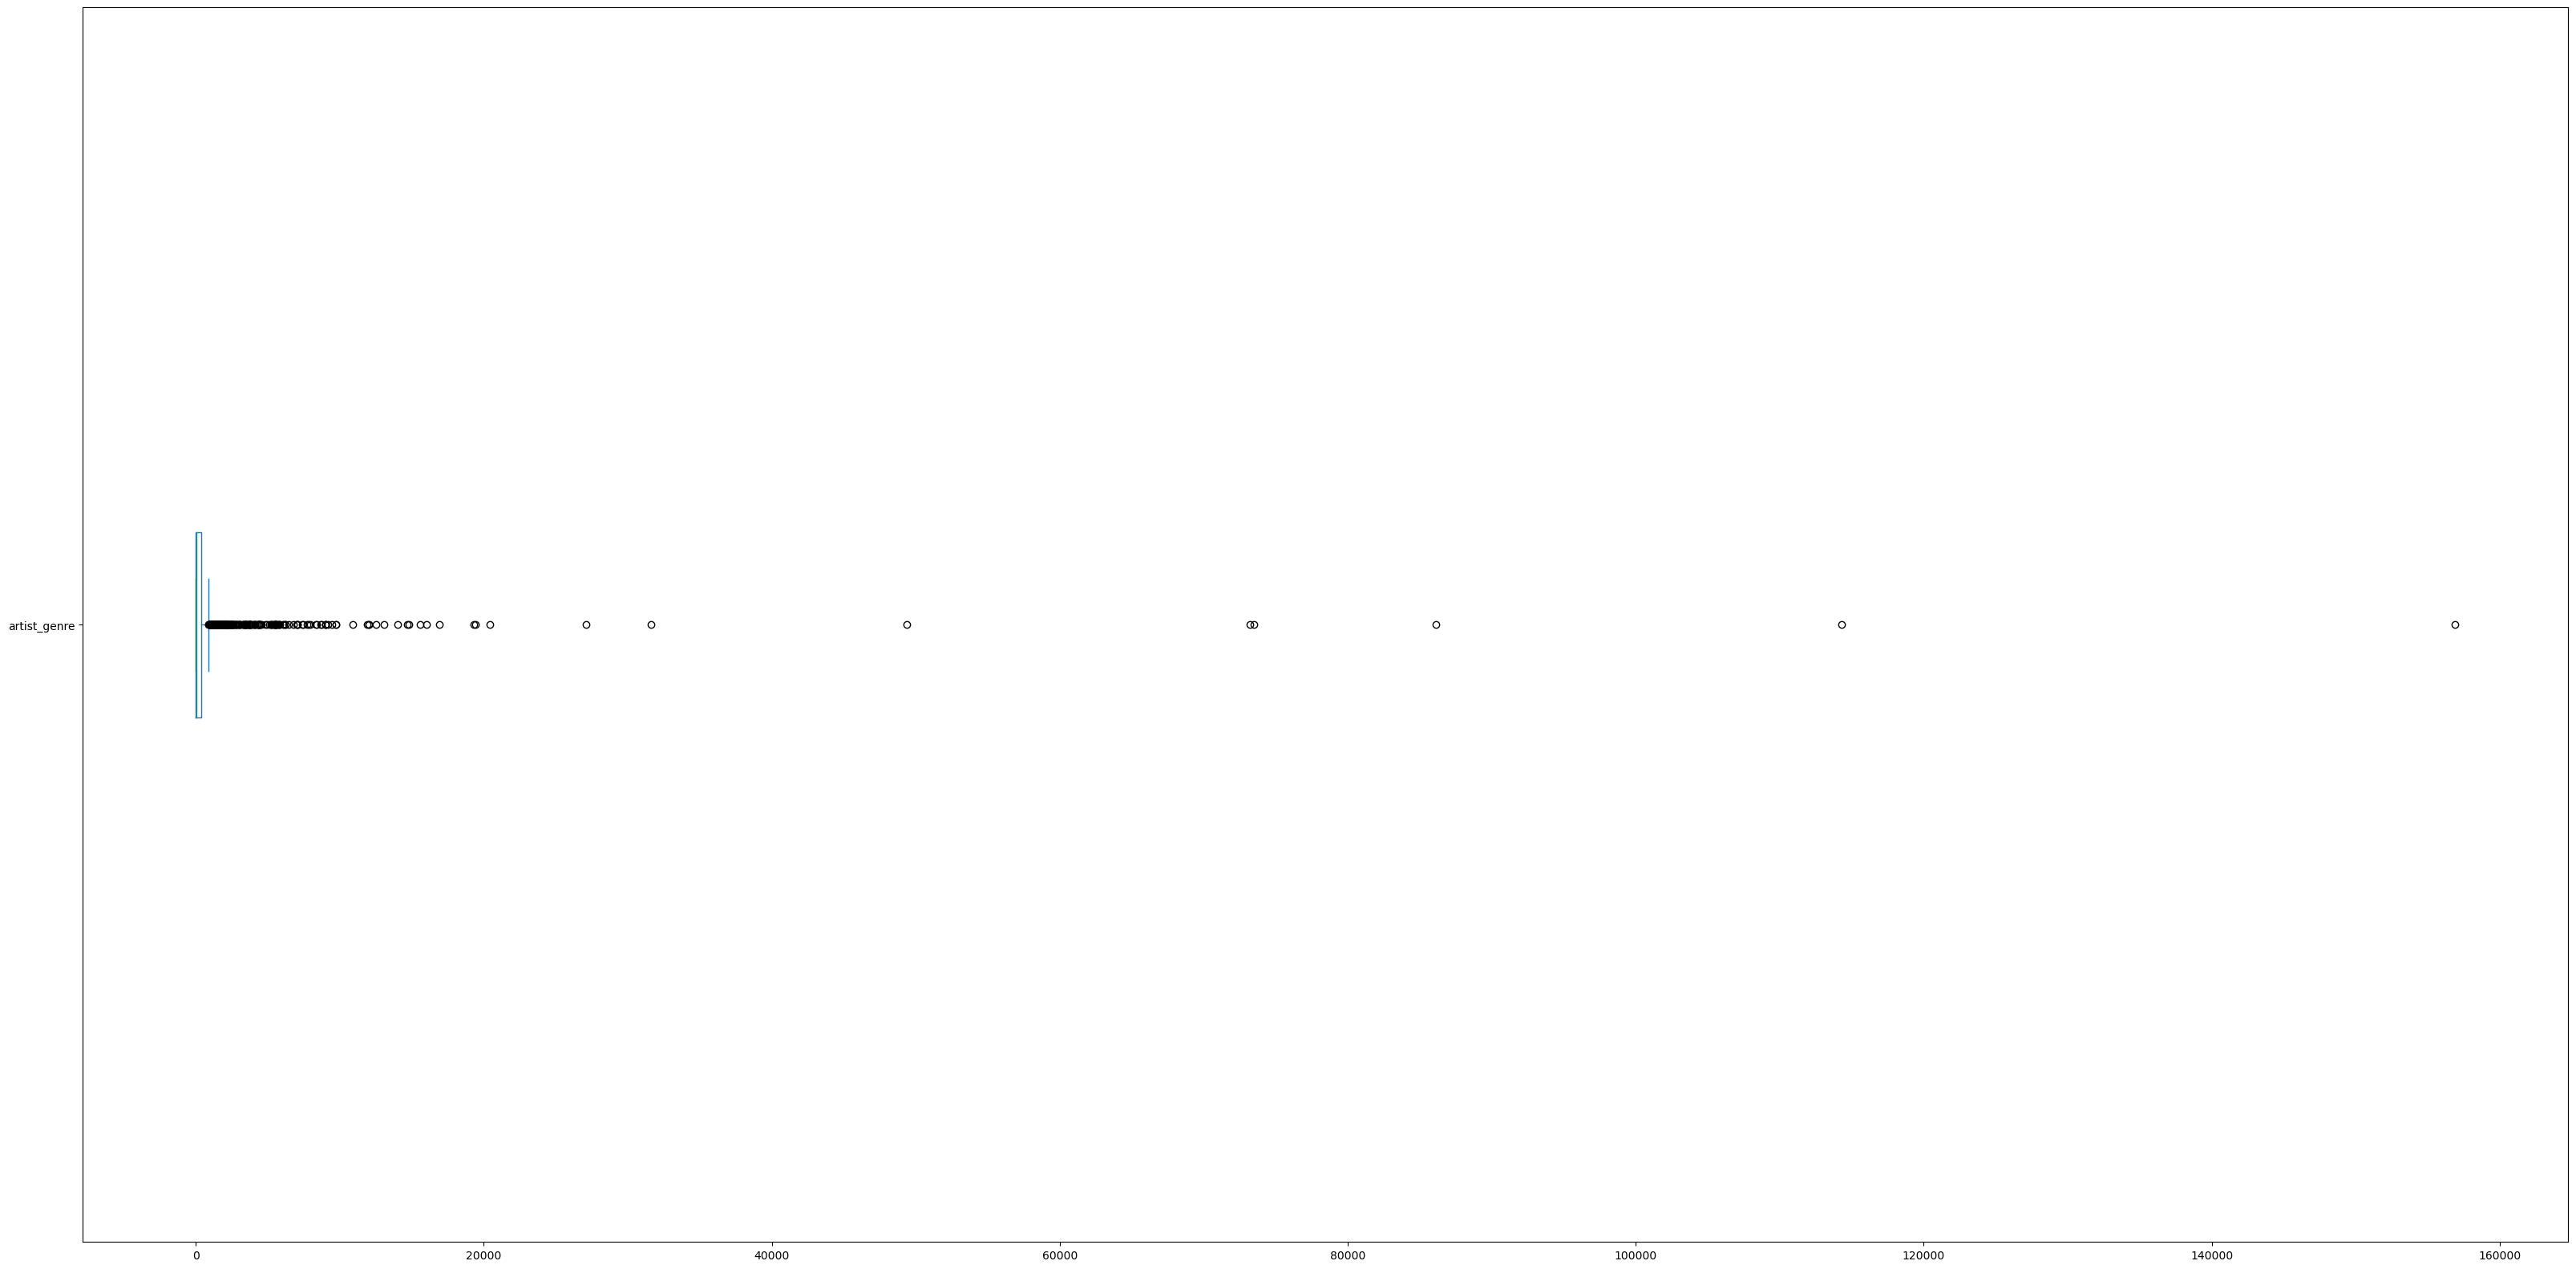

In [46]:
spotify_df['artist_genre'].value_counts().plot(kind='box', vert=False, figsize=(40,20))

In [70]:
spotify_df[spotify_df['artist_genre']=='pop']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,0,As It Was,2022-03-31,1.0,https://i.scdn.co/image/ab67616d0000b273b46f74097655d7f353caab14,6,6,2,1555631,2022-04-14,0.520,0.731,6.0,0.0,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303.0,Argentina,South America,Spanish
42,spotify:track:6UelLqGlWMcVH1E5c4H7lY,110,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,0,Watermelon Sugar,2019-12-13,12.0,https://i.scdn.co/image/ab67616d0000b27377fdcfda6535601aff081b6a,17,101,109,329893,2022-04-14,0.548,0.816,0.0,1.0,-4.209,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000.0,Argentina,South America,Spanish
58,spotify:track:3AJwUDP919kvQ9QcozQPxg,146,Coldplay,1,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a3301762a8fce048cb469,0,Yellow,2000-07-10,10.0,https://i.scdn.co/image/ab67616d0000b2733d92b2ad5af9fbc8637425f0,145,-1,4,277112,2022-04-14,0.429,0.661,11.0,1.0,-7.227,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,Argentina,South America,Spanish
63,spotify:track:3PfIrDoz19wz7qK7tYeu62,153,Dua Lipa,1,Dua Lipa,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,pop,https://i.scdn.co/image/ab6761610000e5ebd42a27db3286b58553da8858,0,Don't Start Now,2020-03-27,11.0,https://i.scdn.co/image/ab67616d0000b273bd26ede1ae69327010d49946,12,143,128,271835,2022-04-14,0.793,0.793,11.0,0.0,-4.521,0.0830,0.01230,0.000000,0.0951,0.679,123.950,183290.0,Argentina,South America,Spanish
78,spotify:track:46IZ0fSY2mpAiktS3KOqds,179,Adele,1,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,pop,https://i.scdn.co/image/ab6761610000e5eb68f6e5892075d7f22615bd17,0,Easy On Me,2021-11-19,12.0,https://i.scdn.co/image/ab67616d0000b273c6b577e4c4a6d326354a89f7,50,156,26,248078,2022-04-14,0.604,0.366,5.0,1.0,-7.519,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787876,spotify:track:4iJyoBOLtHqaGxP12qzhQI,87,"Justin Bieber, Daniel Caesar, Giveon",3,Giveon,spotify:artist:4fxd5Ee7UefO4CUXgwJ7IP,pop,https://i.scdn.co/image/ab6761610000e5eb2c0b7791c1b134d65b587e26,1,Peaches (feat. Daniel Caesar & Giveon),2021-03-19,16.0,https://i.scdn.co/image/ab67616d0000b273e6f407c7f3a0ec98845e4431,6,93,59,68872,2022-05-05,0.677,0.696,0.0,1.0,-6.181,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082.0,Vietnam,Asia,Vietnamese
1787915,spotify:track:1oFAF1hdPOickyHgbuRjyX,119,"The Weeknd, Ariana Grande",2,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,pop,https://i.scdn.co/image/ab6761610000e5ebb5f9e28219c169fd4b9e8379,1,Save Your Tears (Remix) (with Ariana Grande) - Bonus Track,2020-03-20,18.0,https://i.scdn.co/image/ab67616d0000b273b5097b81179824803664aaaf,17,107,54,54704,2022-05-05,0.650,0.825,0.0,1.0,-4.645,0.0325,0.02150,0.000024,0.0936,0.593,118.091,191014.0,Vietnam,Asia,Vietnamese
1787989,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,190,"Charlie Puth, Selena Gomez",2,Selena Gomez,spotify:artist:0C8ZW7ezQVs4URX5aX7Kqx,pop,https://i.scdn.co/image/ab6761610000e5eba5205abffd84341e5bace828,1,We Don't Talk Anymore (feat. Selena Gomez),2015-11-05,14.0,https://i.scdn.co/image/ab67616d0000b273c0e28105f0533c52717c46c2,71,181,168,38376,2022-05-05,0.728,0.563,1.0,0.0,-8.053,0.1340,0.62100,0.000000,0.1790,0.352,100.017,217707.0,Vietnam,Asia,Vietnamese
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2,Maroon 5,spotify:artist:04gD

In [142]:
spotify_df['artist_genre'].value_counts().head(30)

pop                          156910
0                            114300
trap latino                   86148
reggaeton                     73510
latin                         73195
dance pop                     49390
rap                           31621
uk pop                        27131
canadian pop                  20416
k-pop                         19415
reggaeton colombiano          19321
latin pop                     16922
reggaeton flow                16007
hip hop                       15575
latin hip hop                 14823
pop rap                       14719
trap                          14044
trap argentino                13080
german hip hop                12529
pop dance                     12021
melodic rap                   12020
puerto rican pop              11887
tropical house                10921
edm                            9740
polish hip hop                 9723
greek trap                     9435
russian hip hop                9205
canadian contemporary r&b   

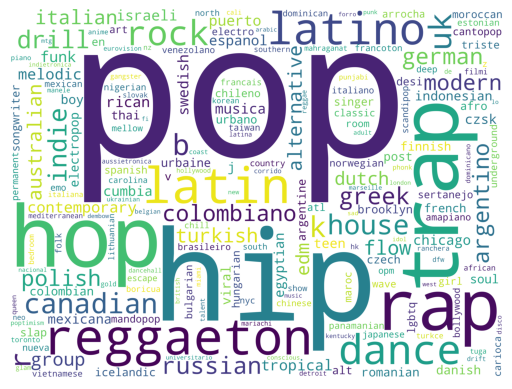

In [83]:
text = ', '.join(spotify_df['artist_genre'])
word_cloud = WordCloud(width=4000, 
                       height=3000, 
                       random_state=1, 
                       background_color='white', 
                    #    colormap='Pastel1',
                       collocations=False,
                       stopwords=', ').generate(text)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [120]:
import gensim.downloader as api
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import multiprocessing
from time import time
from collections import defaultdict

cores = multiprocessing.cpu_count()
cores

16

In [122]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                    #  size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

sent = [spotify_df['artist_genre']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [123]:

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['pop',
 '0',
 'trap latino',
 'reggaeton',
 'latin',
 'dance pop',
 'rap',
 'uk pop',
 'canadian pop',
 'k-pop']

In [124]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.02 mins


In [125]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.66 mins


In [126]:
w2v_model.init_sims(replace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9484\514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [143]:
w2v_model.wv.most_similar(positive=['edm'])

[('uk contemporary r&b', 0.9982650279998779),
 ('indonesian hip hop', 0.9976921081542969),
 ('chicago drill', 0.9974349737167358),
 ('seattle hip hop_seattle hip hop', 0.9974088668823242),
 ('progressive electro house', 0.9973989129066467),
 ('southern hip hop', 0.9973092079162598),
 ('australian pop_bergen indie', 0.997287929058075),
 ('houston rap', 0.997249960899353),
 ('german techno', 0.9972468018531799),
 ('nz pop', 0.9971960783004761)]

In [194]:
from fuzzywuzzy import fuzz
values = list(spotify_df['artist_genre'].value_counts().index)
fuzz.ratio("pop","k-pop")
fuzz.partial_ratio("pop","k-pop")
df = []
for i, k in enumerate(values[:20]):
    matching = {k: []}
    for j in values[i:]:
        if fuzz.partial_ratio(k, j) == 100:
            matching[k].append(j)
    df.append(matching)

In [196]:
len(df)

20

In [197]:
temp = []
for i in df:
    temp.extend(list(df[0].values())[0])

print(len(set(temp)))
display(spotify_df[spotify_df['artist_genre'].isin(set(temp))])

340


,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1453d77d1d758c224bd,0,cuatro veinte,2022-03-24,1.0,https://i.scdn.co/image/ab67616d0000b273116b57ed14bc15d57eb838fa,6,9,3,1923270,2022-04-14,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895.0,Argentina,South America,Spanish
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,0,As It Was,2022-03-31,1.0,https://i.scdn.co/image/ab67616d0000b273b46f74097655d7f353caab14,6,6,2,1555631,2022-04-14,0.520,0.731,6.0,0.0,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303.0,Argentina,South America,Spanish
7,spotify:track:42Gzfqnfpk7Pp1ydM60eNn,20,Maria Becerra,1,Maria Becerra,spotify:artist:1DxLCyH42yaHKGK3cl5bvG,pop argentino,https://i.scdn.co/image/ab6761610000e5eb459b9d1006bd715a7e2d5663,0,Felices x Siempre,2022-02-22,1.0,https://i.scdn.co/image/ab67616d0000b2734d647b8989fa65faeeb841f6,11,15,8,1149499,2022-04-14,0.771,0.467,5.0,0.0,-6.653,0.1230,0.3750,0.009740,0.1120,0.256,100.089,199657.0,Argentina,South America,Spanish
8,spotify:track:3FkeNbs9Zeiqkr3WkbOiGp,23,Anitta,1,Anitta,spotify:artist:7FNnA9vBm6EKceENgCGRMb,funk pop,https://i.scdn.co/image/ab6761610000e5eb847940395e7b755f626ad139,0,Envolver,2022-04-12,15.0,https://i.scdn.co/image/ab67616d0000b27396e2642422ad16661e673fa2,13,17,6,1104997,2022-04-14,0.812,0.736,4.0,0.0,-5.421,0.0833,0.1520,0.002540,0.0914,0.396,91.993,193806.0,Argentina,South America,Spanish
14,spotify:track:2cR9cH9ta7MStHBKs0aOcz,35,Salastkbron,1,Salastkbron,spotify:artist:3WMlRpW5JWuDI95TcEWt3r,pop argentino,https://i.scdn.co/image/ab6761610000e5eb5f3a466d7783b3130b87ab69,0,TITAN,2021-10-14,1.0,https://i.scdn.co/image/ab67616d0000b273a95aa3aaa76f83d4427625ee,2,29,20,838194,2022-04-14,0.725,0.490,5.0,0.0,-9.487,0.1870,0.3410,0.000000,0.0978,0.960,180.042,122137.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787990,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2,Binz,spotify:artist:2nSO7JYDbJrYbJmP39qUzj,v-pop,https://i.scdn.co/image/ab6761610000e5eb6f9ec80eb4598f551999c3ae,1,Cho Mình Em,2021-04-01,1.0,https://i.scdn.co/image/ab67616d0000b273a1ca722c889a36ec84d48649,32,193,56,37880,2022-05-05,0.603,0.412,0.0,1.0,-10.359,0.0579,0.8910,0.021200,0.1150,0.371,99.886,206400.0,Vietnam,Asia,Vietnamese
1787991,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2,Đen,spotify:artist:1LEtM3AleYg1xabW6CRkpi,v-pop,https://i.scdn.co/image/ab6761610000e5eb37206c8851747995ecf49f9d,1,Cho Mình Em,2021-04-01,1.0,https://i.scdn.co/image/ab67616d0000b273a1ca722c889a36ec84d48649,32,193,56,37880,2022-05-05,0.603,0.412,0.0,1.0,-10.359,0.0579,0.8910,0.021200,0.1150,0.371,99.886,206400.0,Vietnam,Asia,Vietnamese
1787992,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2,Kai Đinh,spotify:artist:3E6LGptA8lBEXPHAQCE3vr,v-pop,https://i.scdn.co/image/ab6761610000e5eb8c1162744cc256860318fe92,1,Thế Hệ Tan Vỡ (feat. SIVAN),2021-11-17,1.0,https://i.scdn.co/image/ab67616d0000b2734493b8e39ce5d7d633882637,120,200,13,37825,2022-05-05,0.696,0.477,6.0,0.0,-11.058,0.0421,0.6710,0.000367,0.0938,0.335,140.112,288000.0,Vietnam,Asia,Vietnamese
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,pop,https://i.scdn.co/image/ab6761610000e5eb288ac05481cedc5bddb5b11b,1,Payphone,2012-01-01,33.0,https://i.scdn.co/image/ab

In [198]:
spotify_df[spotify_df['artist_genre'].isin(values[:20])]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,0,As It Was,2022-03-31,1.0,https://i.scdn.co/image/ab67616d0000b273b46f74097655d7f353caab14,6,6,2,1555631,2022-04-14,0.520,0.731,6.0,0.0,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303.0,Argentina,South America,Spanish
11,spotify:track:1UdzJEpgJxtuXAlCOvD4S0,26,Danny Ocean,1,Danny Ocean,spotify:artist:5H1nN1SzW0qNeUEZvuXjAj,latin,https://i.scdn.co/image/ab6761610000e5eb5f8bb457ee2815cc276ddb9d,0,Fuera del mercado,2022-02-17,16.0,https://i.scdn.co/image/ab67616d0000b273be462dd5903fb27996331b48,26,49,3,1029069,2022-04-14,0.453,0.673,8.0,1.0,-5.649,0.1440,0.3200,0.000000,0.1310,0.266,92.060,159849.0,Argentina,South America,Spanish
17,spotify:track:6ylDpki1VpIsc525KC1ojF,39,Sebastian Yatra,1,Sebastian Yatra,spotify:artist:07YUOmWljBTXwIseAUd9TW,latin,https://i.scdn.co/image/ab6761610000e5eb28cc5ee1d7ba49cdc7dde27b,0,Tacones Rojos,2022-01-28,17.0,https://i.scdn.co/image/ab67616d0000b2739f6800546cfaaacb3fa4b145,21,38,25,805602,2022-04-14,0.746,0.844,11.0,0.0,-3.499,0.0359,0.0620,0.000000,0.1490,0.934,123.014,189333.0,Argentina,South America,Spanish
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,0,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,37,31,803350,2022-04-14,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish
19,spotify:track:74aGIoQo8pokxzylUTw603,41,Tiago PZK,1,Tiago PZK,spotify:artist:5Y3MV9DZ0d87NnVm56qSY1,trap argentino,https://i.scdn.co/image/ab6761610000e5ebfa1929a26839ae468cf85f07,0,Hablando De Love,2022-03-17,1.0,https://i.scdn.co/image/ab67616d0000b273b0a748f7a623a17ccab4e311,29,34,4,786293,2022-04-14,0.658,0.892,7.0,0.0,-4.646,0.1460,0.4590,0.000000,0.1010,0.413,91.032,156090.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787989,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,190,"Charlie Puth, Selena Gomez",2,Selena Gomez,spotify:artist:0C8ZW7ezQVs4URX5aX7Kqx,pop,https://i.scdn.co/image/ab6761610000e5eba5205abffd84341e5bace828,1,We Don't Talk Anymore (feat. Selena Gomez),2015-11-05,14.0,https://i.scdn.co/image/ab67616d0000b273c0e28105f0533c52717c46c2,71,181,168,38376,2022-05-05,0.728,0.563,1.0,0.0,-8.053,0.1340,0.6210,0.000000,0.1790,0.352,100.017,217707.0,Vietnam,Asia,Vietnamese
1787993,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2,SIVAN,spotify:artist:0wJWawRvX8K9joiK9QqkX5,0,https://i.scdn.co/image/ab6761610000e5eb0cd580a380f467e4f0b4137d,1,Thế Hệ Tan Vỡ (feat. SIVAN),2021-11-17,1.0,https://i.scdn.co/image/ab67616d0000b2734493b8e39ce5d7d633882637,120,200,13,37825,2022-05-05,0.696,0.477,6.0,0.0,-11.058,0.0421,0.6710,0.000367,0.0938,0.335,140.112,288000.0,Vietnam,Asia,Vietnamese
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,pop,https://i.scdn.co/image/ab6761610000e5eb288ac05481cedc5bddb5b11b,1,Payphone,2012-01-01,33.0,https://i.scdn.co/image/ab67616d0000b273fc8633e22a7dba6aab817bff,197,-1,1,37591,2022-05-05,0.743,0.752,4.0,1.0,-4.813,0.0414,0.0188,0.000000,0.2870,0.545,110.015,231173.0,Vietnam,Asia,Vietnamese
1787995,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2,Wiz Khalifa,spotify:artist:137W8MRPWKqSmrBGDBFSop,hip 

In [99]:
from collections import Counter
def reduce_categories(col, threshold=0.85):
    threshold_value = int(threshold*len(col))
    reduced_cats = []
    s = 0
    counts = Counter(col)
    
    for i, j in counts.most_common():
        s+=dict(counts)[i]
        reduced_cats.append(i)
        if s>=threshold_value:
            break
    reduced_cats.append('Other')
    
    new_col=col.apply(lambda x: x if x in reduced_cats else 'Other')
    return new_col, reduced_cats

col, cate = reduce_categories(spotify_df['artist_genre'])
col.value_counts()

Other               267694
pop                 156910
0                   114300
trap latino          86148
reggaeton            73510
                     ...  
video game music      1356
chalga                1356
folk-pop              1336
gauze pop             1335
pop reggaeton         1318
Name: artist_genre, Length: 224, dtype: int64

#### **Tính toán các mô hình**

In [70]:
numeric_data = spotify_df.select_dtypes(include=np.number)
numeric_data.head()

,rank,artists_num,collab,peak_rank,previous_rank,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,1,1,0,1,1,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203.0
1,2,1,0,2,129,0.654,0.354,5.0,1.0,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547.0
2,3,1,0,3,59,0.721,0.463,1.0,0.0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003.0
3,5,1,0,5,5,0.870,0.548,10.0,0.0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750.0
4,6,1,0,6,9,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895.0


In [84]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
kmeans = KMeans(n_clusters=1874, random_state=0)
X = spotify_df[audio_cols].dropna()
Y = spotify_df['artist_genre'][spotify_df[audio_cols].dropna().index]
X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=round(0.3*len(X)))

print("Training size: ", len(Y_train))
print("Test size    : ", len(Y_test))
kmeans.fit(X_train, Y_train)
print(kmeans.cluster_centers_)

Training size:  1251272
Test size    :  536259
[[6.24394077e-01 7.36364465e-01 5.69703872e+00 ... 6.29731967e-01
  1.21985687e+02 1.76666781e+05]
 [6.70935065e-01 6.02140260e-01 3.72467532e+00 ... 4.00568831e-01
  1.06672688e+02 2.73617886e+05]
 [6.72498231e-01 7.44366156e-01 5.01179245e+00 ... 7.38843750e-01
  1.73797272e+02 4.13109588e+05]
 ...
 [7.07818065e-01 7.20058065e-01 7.47612903e+00 ... 6.05420645e-01
  1.21428057e+02 1.69022274e+05]
 [6.86545802e-01 6.65595420e-01 3.79770992e+00 ... 5.01404580e-01
  1.12495550e+02 1.97006729e+05]
 [7.58418301e-01 6.46575163e-01 6.18300654e+00 ... 6.26372549e-01
  1.14303941e+02 1.49909346e+05]]


In [86]:
X_train

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
246230,0.774,0.676,6.0,0.0,-5.238,0.2930,0.0589,0.000000,0.0941,0.233,165.910,162520.0
1381187,0.677,0.696,0.0,1.0,-6.181,0.1190,0.3210,0.000000,0.4200,0.464,90.030,198082.0
1183749,0.591,0.764,1.0,1.0,-5.484,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0
890840,0.360,0.317,2.0,1.0,-9.483,0.0340,0.8270,0.000002,0.1010,0.278,178.236,196824.0
404546,0.570,0.455,1.0,0.0,-5.748,0.0996,0.4410,0.000746,0.0654,0.399,167.933,151429.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1079117,0.728,0.542,0.0,1.0,-5.195,0.0514,0.2590,0.000000,0.1360,0.637,90.016,227234.0
1684009,0.586,0.616,5.0,1.0,-7.964,0.0324,0.1820,0.000000,0.0927,0.719,148.088,242096.0
1468911,0.591,0.764,1.0,1.0,-5.484,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0
465243,0.715,0.622,4.0,0.0,-5.102,0.0460,0.1630,0.000000,0.0948,0.808,80.015,195053.0


In [95]:
import numpy as np
np.concatenate((X_train, Y_train[:, None]), axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18640\1224606659.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  np.concatenate((X_train, Y_train[:, None]), axis=1)


array([[0.774, 0.6759999999999999, 6.0, ..., 165.91, 162520.0, 'latin'],
       [0.677, 0.696, 0.0, ..., 90.03, 198082.0, 'canadian pop'],
       [0.591, 0.764, 1.0, ..., 169.928, 141806.0, 'australian hip hop'],
       ...,
       [0.591, 0.764, 1.0, ..., 169.928, 141806.0, 'australian hip hop'],
       [0.715, 0.622, 4.0, ..., 80.015, 195053.0, 'trap latino'],
       [0.883, 0.674, 11.0, ..., 141.02, 278085.0, 'uk hip hop']],
      dtype=object)

In [111]:
clasee = np.column_stack([kmeans.predict(X_train),Y_train])
clasee

array([[1685, 'latin'],
       [115, 'canadian pop'],
       [188, 'australian hip hop'],
       ...,
       [188, 'australian hip hop'],
       [831, 'trap latino'],
       [167, 'uk hip hop']], dtype=object)

In [154]:
classa = pd.DataFrame(clasee, columns = ['code', 'artist_genre'])
group = classa.groupby('code').get_group(1132)

group

,code,artist_genre
1181,1132,pop
5108,1132,chalga
7322,1132,pop reggaeton
7424,1132,macedonian folk
9403,1132,chalga
...,...,...
1241327,1132,pop
1242581,1132,bulgarian pop
1243990,1132,toronto rap
1250331,1132,uk pop


In [143]:
Y_test.head()

1704916           russian hip hop
536423                        pop
946595     modern alternative pop
314315              greek hip hop
658068                trap latino
Name: artist_genre, dtype: object

In [152]:
kmeans.predict(X_test)[:5]

array([ 824, 1627,  299, 1603, 1132])